# Python tips and tricks

These exercises revisit some snippets of Python codes that have appeared in various Notebooks to this point in the course. Many times, these codes were used (by me) because they were an efficient way to accomplish a specific thing, but they were not necessarily explained in detail within the notebook. In this Notebook, we will try to build a better understanding of Python syntax, and we'll cover a few tips and tricks. At this point, you've used Python enough that you should be familiar with the basic syntax and logic, so now is a good time to try to learn a few intermediate skills.

In [33]:
import numpy as np
import scipy.optimize as opt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from math import ceil, floor

## A Review of Topics seen in [Notebook 25 (Levenspiel Plots)](https://jqbond.github.io/CEN587/Notebooks/587-N25.html)

We've have been discussing trends in the size (volume) of flow reactors (CSTRs and PFRs). All of our examples have considered the same irreversible reaction involving two species:

$$A \longrightarrow B$$

We have assumed the rate of reaction depends only on the concentration of A, and that the reaction order is unspecified, though it always obeys power law kinetics, i.e., $r = k{C_A}^{\alpha}$. We have further assumed that the reaction occurs homogeneously and that the intensive reaction rate has units of moles per liter per time. We are also assuming that any parameter in the problem (k, CAf, FAf, Q, etc.) has a numerical value of 1 in appropriate units. Finally, we have specified that fluid density is constant and that reactors always operate at steady state. With these things in mind, we can develop the rate law below, which illustrates the functional dependence of rate on $C_A$ and, by extension $X_A$.

$$r = k{C_A}^\alpha = kC_{A,f}^\alpha \, (1 - X_A)^\alpha$$

In [Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html), we illustrated trends in CSTR and PFR sizes (volumes) as the reaction order, $\alpha$, changes. We did this using a few generic functions that solve for either CSTR or PFR volume provided we give them input arguments of arguments of effluent fractional conversion ($X_A$) and reaction order ($\alpha$).For this Notebook, let's build up to this in a few (hopefully intuitive) steps that will start by mirroring the way we might try to do things using paper-and-pencil work and evaluating numerical answers with a calculator.  First, if you review the concepts in [Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html), you should be able to convince yourself that you can solve a material balance on component $A$ in a CSTR operating at steady state to obtain the following expression for CSTR Volume:  

$$V_\textrm{CSTR} = \frac{F_{A,f}X_A}{r}$$

We see that there is a reaction rate in that expression. As discussed above, reaction rate is generally a function of fractional conversion since it depends on the concentrations of reacting species. We can then substitute the expression for reaction rate as a function of conversion, $r(X_A) = kC_{A,f}^\alpha \, (1 - X_A)^\alpha$ into this expression, which will then give us CSTR volume as a function of fractional conversion:

$$V_\textrm{CSTR}(X_A) = \frac{F_{A,f}X_A}{kC_{A,f}^\alpha \, (1 - X_A)^\alpha}$$

If we examine this expression, we should see that it is indeed a univariate function (once we specify the reaction order $\alpha$). The right hand side is comprised entirely of constants (for a fixed value of $\alpha$), so all we have to do is pass it a desired value of effluent fractional conversion, and it will return the CSTR Volume that is required to achieve that conversion.

## Calculating the CSTR Volume for a single fractional conversion with a first order reaction

Let's start with the operation described above -- we'll calculate the CSTR Volume required to achieve a single effluent fractional conversion of species A, namely $X_A = 0.5$. This should *feel* relatively familiar and comfortable because we are substituting numbers into the right hand side of the function and performing a few mathematical operations to find the reactor volume. This is something we could do using a calculator and is probably how we are used to solving many problems in chemistry, mathematics, physics, and engineering.

In the cell below, we perform the calculations much as you would using a calculator. We will then print the answer using a ***formatted string literal***, which adapts the conventional `printf()` syntax from C and gives us a convenient way to format printed outputs.

### Formatted string literals in Python

Formatted string literals appear in the `print()` statement below. In Python, we denote a formatted string literal using the following conceptual syntax:

    f'...string...{numerical_value:format}...'
    
You've seen these frequently by now in these CEN 587 Notebooks because they allow us to seamlessly import numerical answers into an information-rich string, so they are useful for conveying information and for proving context about the solution instead of simply printing a number and units. It is useful and extensible for us to learn `printf()` formatting syntax -- not only is it handy in Pyuthon, the `printf()` syntax is relatively consistent across various modern languages. For example, Python, Matlab, and Julia all use variations of `printf()`, so it is worth learning a little about how to change formatting with `printf()` codes...

The basic idea is that, in Python, an "f-string" allows us to import a numerical value into a string; we do this using curly braces `{}` in the string. Once in the curly braces, we use the following syntax:

    {number:X.Yf}
    
In plain terms, this says to print the value of "number" and to format that number as a "f"loating point decimal. Further, it says to reserve a minimum of "X" spaces for this number in the print output and to round the value of "number" to "Y" decimal places. We have a lot of flexibility in how we format numbers in f-strings. You can do some fairly advanced formatting of your print output with string literals. The formatting codes are summarized in the link below, and we'll try to apply many of them as we work through this Notebook.

http://cissandbox.bentley.edu/sandbox/wp-content/uploads/2022-02-10-Documentation-on-f-strings-Updated.pdf

At a minimum for engineers, it is useful to know how to format numbers as floating point decimals, `{number:f}`, and in exponential (scientific) notation, `{number value:E}` or `{number value:e}`. We should probably also be aware of formatting codes for integers `{integer value:d}` or `{integer value:n}` and strings `{'string definition':s}`



In [34]:
####################################################################################################
# These are a few global variable definitions; they will remain unchanged throughout the notebook  #
####################################################################################################

k   = 1
CAf = 1
FAf = 1

####################################################################################################
# Here are some parameters that are defined as globals, but they will be overwritten later...      #
# This is not necessarily best practice, but it is a straightforward way to write the scripts      #
####################################################################################################

α   = 1
XA  = 0.5

################################################################
# Now we perform a few "plug in the number" calculations       #
################################################################

CA  = CAf*(1 - XA)
r   = k*CA**α
V   = FAf*XA/r

###############################################################################################################
# We can create an f-string; we'll bind it to a variable name for illustration purposes, but this is optional #
###############################################################################################################

fstring_for_printing = f'A {V:3.1f}L CSTR will achieve a fractional conversion of XA = {XA:4.2f}'

###############################################################################################################
# Now that we have a string, we can print it!                                                                 #
###############################################################################################################

print(fstring_for_printing)

###############################################################################################################
# As noted above, there is nothing stopping us from passing an f-string directly to print()                   #
###############################################################################################################
print(f'A {V:3.1f}L CSTR will achieve a fractional conversion of XA = {XA:4.2f}')

A 1.0L CSTR will achieve a fractional conversion of XA = 0.50
A 1.0L CSTR will achieve a fractional conversion of XA = 0.50


## Calculating the CSTR Volume for many fractional conversions with a first order reaction

If we wanted to evaluate the CSTR volume required to achieve many different fractional conversions, we could do this in many ways. One intuitive way is to create a numpy array of values of fractional conversion that we're interested in. We can then broadcast the CSTR volume calculation to each of these values.

```{tip}
Remember: when we work with numpy arrays, the default behavior is generally that mathematical operations will **broadcast** to each element in the array!
```

At the end of the cell below, we'll print the results for $V$ at various target values of $X_A$. If we do not take any steps to specify formatting, we'll see that these results print as raw arrays, which is difficult for the reader of these results to interpret.  Let's work through the calculations, then we'll consider better ways to present the "answers" when we have to solve multiple instances of the same problem and are then dealing with an **array** of results.

In [35]:
###############################################################################
# Re-defining a few global variables, XA is an array in this example          #
###############################################################################

α   = 1
XA  = np.array([0.0, 0.25, 0.5, 0.75, 0.9]) # Different from the first example! Here we have a numpy array containing many fractional conversions!

###############################################################################
# Now we are plugging 5 numbers in and evaluating the result 5 times          #
# In each case, the results of the 5 calculations are stored in arrays        #
# This is an example of broadcasting                                          #
###############################################################################

CA    = CAf*(1 - XA)
r     = k*CA**α
V     = FAf*XA/r

###############################################################################
# Now look at what happens if we print XA and V -- we get arrays of results   #
###############################################################################

print(XA)
print(V)

[0.   0.25 0.5  0.75 0.9 ]
[0.         0.33333333 1.         3.         9.        ]


### Looping over values in the array with a `for` loop

Once we work through the cell above, we should be able to conclude that the process of calculating many different volumes for many different fractional conversions is relatively easy with numpy arrays because we can broadcast mathematical operations to each element in the array. Unfortunately, the presentation of results is pretty rough. It would be much nicer if we could come up with a way to provide context and units for all of those numbers, ideally with clean formatting and minimal coding. One way that we might consider doing this is with a `for` loop. The basic concept here would be to embed a `print()` operation inside of the body of the for loop, and have it print each element in the array. 

In [36]:
for i in range(0, len(XA), 1):
    print(f'To achieve a conversion of {XA[i]:4.2f}, the required volume is {V[i]:4.2f}L')

To achieve a conversion of 0.00, the required volume is 0.00L
To achieve a conversion of 0.25, the required volume is 0.33L
To achieve a conversion of 0.50, the required volume is 1.00L
To achieve a conversion of 0.75, the required volume is 3.00L
To achieve a conversion of 0.90, the required volume is 9.00L


### Looping over multiple iterables with `zip()`

One thing you might notice in the above for loop is that we're looping over a single iterable, $i$, which comprises the value of the index of each array and ranges from values of 0 to 4 (Python excludes the final element in a `range()`). We then pass the value of this index $i$ to the two arrays of interest $(X_A \ \mathrm{and} \ V)$, and we print their values within an f-string on each pass through the loop. The `zip()` function in Python is also handy in this type of scenario. It allows you to to iterate over *many* iterables simultaneously instead of just one.  

```{caution}
Iterables used with `zip()` must be the same size!
```
Functionally, the loop below that uses `zip()` accomplishes the same thing as the one above using `range()`. They are both good, workable options, and it is up to you to decide which is preferable in your particular scenario.

In [37]:
for conversion, volume in zip(XA, V):
    print(f'To achieve a conversion of {conversion:4.2f}, the required volume is {volume:4.2f}L')

To achieve a conversion of 0.00, the required volume is 0.00L
To achieve a conversion of 0.25, the required volume is 0.33L
To achieve a conversion of 0.50, the required volume is 1.00L
To achieve a conversion of 0.75, the required volume is 3.00L
To achieve a conversion of 0.90, the required volume is 9.00L


## Calculating the CSTR Volume required for many conversions AND many reaction orders.

Trying to broadcast to numpy arrays can becomes cumbersome if we need to broadcast over multiple arrays. That is the case where where we would like to calculate the CSTR volume required for many conversions and many reaction orders. Of particular concern, Python will not broadcast if we have different dimensions of arrays because it cannot intuit exactly what we want to do and how we want to broadcast (see the error below).  The error is retained in this Notebook so that you begin to recognize error messages and understand their root cause; here, the error is thrown when we attempt to calculate reaction rate, $r$, for 100 values of $X_A$ and 5 values of α. The result of that calculation should either be a tall array of shape $(100, 5)$ or a wide array of shape $(5, 100)$, but Python won't make that decision for us as it is ambiguous what we really want. In  most cases, we need to be more specific about the shape of outpur arrays when we try to iterate over multiple dimensions. 

In [38]:
###################################################################################
# Re-defining some globals; XA and α are both arrays in this case                 #
###################################################################################

α   = np.array([-2, -1, 0, 1, 2])#Many reaction orders
XA  = np.linspace(0.0, 0.9, 100) #Many fractional conversions
CA  = CAf*(1 - XA)
r   = k*CA**α
V   = FAf*XA/r

ValueError: operands could not be broadcast together with shapes (100,) (5,) 

### Iterating over multiple dimensions with loops

If we want to evaluate the CSTR volumes required for multiple values of fractional conversion, $X_A$, and multiple reaction orders, $\alpha$, we might naively think about pasting the above code into multiple cells and redefining the value of $\alpha$ each time. There is nothing wrong with that approach per se, but it is inefficient, and it results in a lot of redundant code that is then difficult for future users to understand. It would be better to perform these calculations in a single block of code -- we can do this by creating nested for loops that loop over two different iterators. One advantage of this approach (compared to `zip()`) is that the nested iterators can be different sizes. 

In [ ]:
###################################################################################
# Re-defining some globals; XA and α are both arrays in this case                 #
###################################################################################

α   = np.array([-2, -1, 0, 1, 2])#Many reaction orders
XA  = np.linspace(0.0, 0.9, 100) #Many fractional conversions

###################################################################################
# We could broadcast the calculation of CA since it only involves the XA array... #
###################################################################################

CA  = CAf*(1 - XA)

###################################################################################
# But we can't broadcast to find r as it involves 100 values of CA and 5 of α     #
# We need to loop over both iterables                                             # 
###################################################################################

for x in XA:
    for a in α:
        C = CAf*(1 - x)
        r = k*C**a
        V = FAf*x/r

###################################################################################
# Printing V here only displays the result of the final iteration                 #
# This happens because we didn't explicitly store other results                   #
###################################################################################

print(f'V = {V:4.1f}L')

V = 90.0L


#### Storing and displaying results calculated using a loop

Generally speaking, the interior of a loop is comprised of local variables that are going to be re-defined on each pass through the loop. This is why, in the code cell above, when we attempt to print the reactor volume $V$ we get a single result of $V = 90.0\mathrm{L}$. This is actually ***the last*** value of volume calculated, which was done for $X_A = 0.9$ and $\alpha = 2$. If we want to see the results of ***all*** calculations, we need to be careful to store values and/or find some way to display results on each pass through the loop.

In [ ]:
###################################################################################
# Re-defining some globals; XA and α are both arrays in this case                 #
###################################################################################

α   = np.array([-2, -1, 0, 1, 2])#Many reaction orders
XA  = np.linspace(0.0, 0.9, 100) #Many fractional conversions

###################################################################################
# Loop over both iterables, but pre-allocate a storage array for V                # 
###################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

for i in range(0, len(XA), 1):     #iterate over rows with index i; there are length(XA) elements
    for j in range(0, len(α), 1):  #iterate over columns with index j; there are length(α) elements
        C = CAf*(1 - XA[i])        #calculate local concentration on this iteration
        r = k*C**α[j]              #calculate local rate on this iteration
        V[i,j] = FAf*x/r           #overwrite the [i,j] element in V with the volume result for this iteration

###################################################################################
# Printing V here will show us a 2D array of shape (100, 5)                       #
###################################################################################

print(V)

[[9.00000000e-01 9.00000000e-01 9.00000000e-01 9.00000000e-01
  9.00000000e-01]
 [8.83710744e-01 8.91818182e-01 9.00000000e-01 9.08256881e-01
  9.16589513e-01]
 [8.67570248e-01 8.83636364e-01 9.00000000e-01 9.16666667e-01
  9.33641975e-01]
 [8.51578512e-01 8.75454545e-01 9.00000000e-01 9.25233645e-01
  9.51174775e-01]
 [8.35735537e-01 8.67272727e-01 9.00000000e-01 9.33962264e-01
  9.69206123e-01]
 [8.20041322e-01 8.59090909e-01 9.00000000e-01 9.42857143e-01
  9.87755102e-01]
 [8.04495868e-01 8.50909091e-01 9.00000000e-01 9.51923077e-01
  1.00684172e+00]
 [7.89099174e-01 8.42727273e-01 9.00000000e-01 9.61165049e-01
  1.02648695e+00]
 [7.73851240e-01 8.34545455e-01 9.00000000e-01 9.70588235e-01
  1.04671280e+00]
 [7.58752066e-01 8.26363636e-01 9.00000000e-01 9.80198020e-01
  1.06754240e+00]
 [7.43801653e-01 8.18181818e-01 9.00000000e-01 9.90000000e-01
  1.08900000e+00]
 [7.29000000e-01 8.10000000e-01 9.00000000e-01 1.00000000e+00
  1.11111111e+00]
 [7.14347107e-01 8.01818182e-01 9.000000

It might not occur to us at first, but another way that we could write this loop is to loop only over reaction orders and to broadcast the volume calculation to all values of fractional conversion for each value of reaction order. This is implemented in the cell below.

In [ ]:
###################################################################################
# Re-defining some globals; XA and α are both arrays in this case                 #
###################################################################################

α   = np.array([-2, -1, 0, 1, 2])#Many reaction orders
XA  = np.linspace(0.0, 0.9, 100) #Many fractional conversions

###################################################################################
# Loop over reaction orders, broadcast to conversions, pre-allocate storage for V # 
###################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

for j in range(0, len(α), 1):  #iterate over columns with index j; there are length(α) elements
    C = CAf*(1 - XA)           #calculate all concentration on this iteration of reaction order
    r = k*C**α[j]              #calculate all rates on this iteration of reaction order
    V[:,j] = FAf*XA/r          #overwrite all rows in the jth column of V with the volume results for this iteration

###################################################################################
# Printing V here will show us a 2D array of shape (100, 5)                       #
###################################################################################

print(V)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.92637115e-03 9.00826446e-03 9.09090909e-03 9.17431193e-03
  9.25847993e-03]
 [1.75266717e-02 1.78512397e-02 1.81818182e-02 1.85185185e-02
  1.88614540e-02]
 [2.58054095e-02 2.65289256e-02 2.72727273e-02 2.80373832e-02
  2.88234780e-02]
 [3.37670924e-02 3.50413223e-02 3.63636364e-02 3.77358491e-02
  3.91598434e-02]
 [4.14162284e-02 4.33884298e-02 4.54545455e-02 4.76190476e-02
  4.98866213e-02]
 [4.87573253e-02 5.15702479e-02 5.45454545e-02 5.76923077e-02
  6.10207101e-02]
 [5.57948911e-02 5.95867769e-02 6.36363636e-02 6.79611650e-02
  7.25798850e-02]
 [6.25334335e-02 6.74380165e-02 7.27272727e-02 7.84313725e-02
  8.45828527e-02]
 [6.89774606e-02 7.51239669e-02 8.18181818e-02 8.91089109e-02
  9.70493089e-02]
 [7.51314801e-02 8.26446281e-02 9.09090909e-02 1.00000000e-01
  1.10000000e-01]
 [8.10000000e-02 9.00000000e-02 1.00000000e-01 1.11111111e-01
  1.23456790e-01]
 [8.65875282e-02 9.71900826e-02 1.090909

#### Graphing the results are probably our best option for this quantity of data

Above, we see that printing volumes isn't really useful. There are too many $(X_A, \alpha)$ combinations (500) for us to make sense of the data or trends therein. Probably, the best way to approach this would be to graph the results somehow. We are working with a 3D data set here -- we have calculated $V(X_A, \alpha)$, and there are certainly options for visualizing 3D data (contour plots, surface plots, etc.)  That said, true 3D visualizations benefit from calculating results for a large set of **all** independent variables with small steps between each value as this approaches the behavior of a continuous function. Here we have only tabulated results for 5 discrete reaction orders, $\alpha = [-2, -1, 0, 1, 2]$ and there are fairly large increments between each reaction order. In this case, the best visualization strategy is probably to create 5 different plots of $V(X_A)$, one for each reaction order considered.  We'll do this here by plotting on specific loop iterations. Note that here, we want to add a graph to the plot for each value of reaction order, $j$. This might benefit from thinking a little about how we structure the loops. In the cell below, we present a few possible code blocks that generate identical graphs.

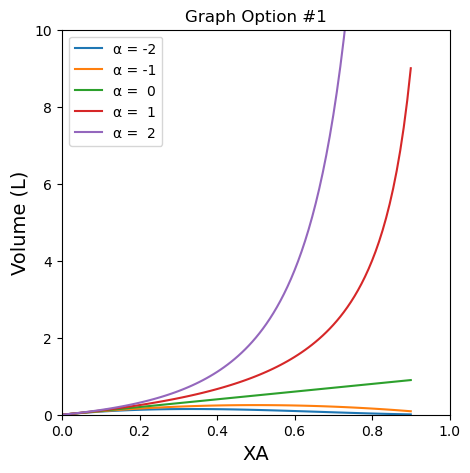

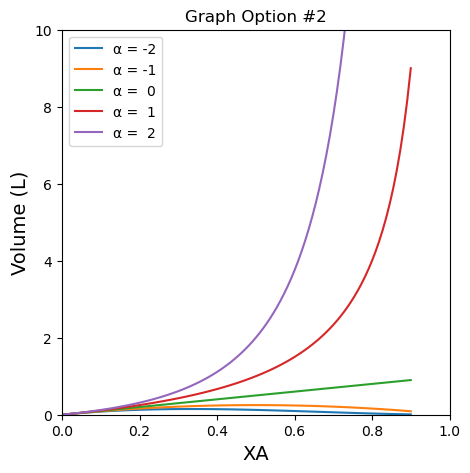

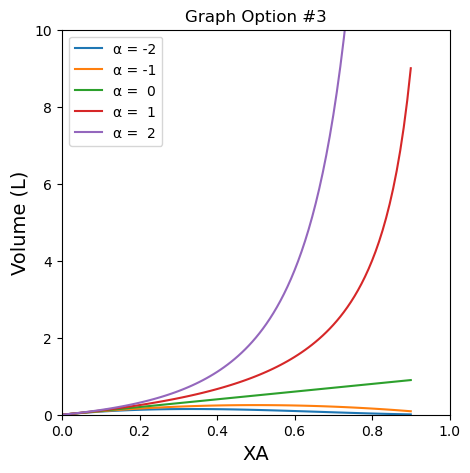

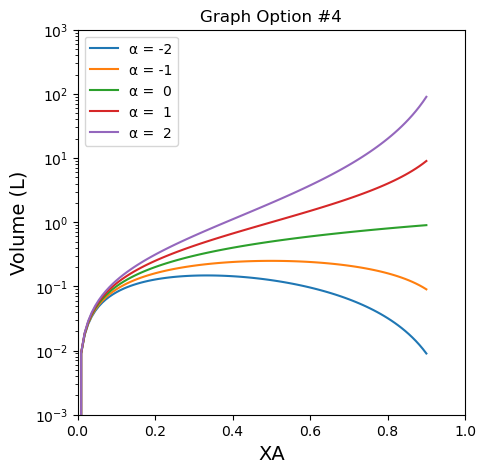

In [ ]:
###################################################################################
# Re-defining some globals; XA and α are both arrays in this case                 #
###################################################################################

α   = np.array([-2, -1, 0, 1, 2])#Many reaction orders
XA  = np.linspace(0.0, 0.9, 100) #Many fractional conversions

###################################################################################
# Loop over both iterables, but pre-allocate a storage array for V                # 
###################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

for i in range(0, len(XA), 1):     #iterate over rows with index i; there are length(XA) elements
    for j in range(0, len(α), 1):  #iterate over columns with index j; there are length(α) elements
        C = CAf*(1 - XA[i])        #calculate local concentration on this iteration
        r = k*C**α[j]              #calculate local rate on this iteration
        V[i,j] = FAf*XA[i]/r           #overwrite

########################################################################################
# Create a figure; loop over columns; add a graph on each pass                         #
########################################################################################

plt.figure(figsize = (5,5))
for j in range(0, len(α), 1):
    plt.plot(XA, V[:, j], label = f'α = {α[j]:>2d}') #formatting code :>2n says print in a 2 character space as an integer (d) and right justify (>)
plt.title("Graph Option #1")
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

########################################################################################
# Alternate syntax using one nested loop                                               #
# Note that we've switched indices for inner and outer loop to facilitate              #
########################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

plt.figure(figsize = (5,5))
for j in range(0, len(α), 1):     #iterate over rows with index i; there are length(XA) elements
    for i in range(0, len(XA), 1):  #iterate over columns with index j; there are length(α) elements
        C = CAf*(1 - XA[i])        #calculate local concentration on this iteration
        r = k*C**α[j]              #calculate local rate on this iteration
        V[i,j] = FAf*XA[i]/r
    plt.plot(XA, V[:, j], label = f'α = {α[j]:>2d}')
plt.title("Graph Option #2")
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

###################################################################################
# Loop over reaction orders, broadcast to conversions, pre-allocate storage for V # 
###################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

plt.figure(figsize = (5,5))
for j in range(0, len(α), 1):  #iterate over columns with index j; there are length(α) elements
    C = CAf*(1 - XA)           #calculate all concentration on this iteration of reaction order
    r = k*C**α[j]              #calculate all rates on this iteration of reaction order
    V[:,j] = FAf*XA/r          #overwrite all rows in the jth column of V with the volume results for this iteration
    plt.plot(XA, V[:, j], label = f'α = {α[j]:>2d}')
plt.title("Graph Option #3")
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

########################################################################################
# Similar to above except using a semilog (y axis) plot to account for scales          #
########################################################################################

V = np.zeros((len(XA), len(α))) #create 2D arrays of zeros; shape is (length(XA), length(α)) or (100, 5) for this specific example.

plt.figure(figsize = (5,5))
for j in range(0, len(α), 1):  #iterate over columns with index j; there are length(α) elements
    C = CAf*(1 - XA)           #calculate all concentration on this iteration of reaction order
    r = k*C**α[j]              #calculate all rates on this iteration of reaction order
    V[:,j] = FAf*XA/r          #overwrite all rows in the jth column of V with the volume results for this iteration
    plt.semilogy(XA, V[:, j], label = f'α = {α[j]:>2d}')
plt.title("Graph Option #4")
plt.xlim(0, 1)
plt.ylim(1e-3, 1e3)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()
      

## Defining a function to calculate CSTR volume for an arbitrary conversion and reaction order

When writing programs, there are usually many strategies for accomplishing the goal. Some are more intuitive but might be less efficient and lead to messy code. On the other hand, clean and efficient code is not always intuitive. The more we write code, the better we'll become at making that code clean, concise, and efficient; moreover, you probably will continue to improve no matter how long you work on programming. There are always new tricks, techniques, and shortcuts that might help you to write more efficient codes. My best suggestion is to not rush it. Write code that (1) is intuitive and (2) gets you the correct result. Once you can do that reliably, then work on writing clean, fast, and efficient codes. 

That said, one simple strategy for making code cleaner and more efficient is to use functions that contain all of the operations of interest and can then perform them on any arguments that we pass to them. Below, let's a function that essentially does what we did above, which is to calculate the volume of a CSTR for a specified value of fractional conversion of $A$, $X_A$, and a specified value of reaction order, $\alpha$. We'll make the function flexible by allowing it to take these two critical values as arguments, so our function will have the form $V(X_A, \alpha)$. Any time we'd like to use the function to calculate a CSTR volume for a given $(X_A, \alpha)$ pair, we pass these as arguments and the function will generate the result for that set of inputs. In the next cell, we create the function and then use it to solve for the CSTR Volume required to achieve $X_A = 0.5$ for a first order reaction. We calculated this result above, and we know that the answer is $V = 1.0\mathrm{L}$, so we're just benchmarking to test whether our function is working correctly. 

In [ ]:
###################################################################################
# Define VCSTR(XA, α) function                                                    #
###################################################################################

def VCSTR(X, a):
    k     = 1
    CAf   = 1
    FAf   = 1
    CA    = CAf*(1 - X) #Remember, the only relevant conversion in a CSTR is at the exit
    r     = k*CA**a
    V     = FAf*X/r
    return V

print(f'For a first order reaction, a {VCSTR(0.5, 1):3.1f}L CSTR will achieve a conversion of XA = 0.5')

For a first order reaction, a 1.0L CSTR will achieve a conversion of XA = 0.5


### Broadcasting this function to a numpy array to V for many conversions and first order kinetics

Now that we have this function, we will use it to do basically the same things we did in the initial sections of the notebook. Below, we pass a numpy array of fractional conversions to calculate the required volumes as a function of fractional conversion for a first order reaction.  We then graph the result. As you study the code block below, contrast it with the cells above wherein we re-defined a set of operations for each case considered. Here, we define the function once and then pass it a new set of arguments for each case considered. The differences here are pretty subtle, but they are conceptually important, and they will become much more significant as operations become more complex.

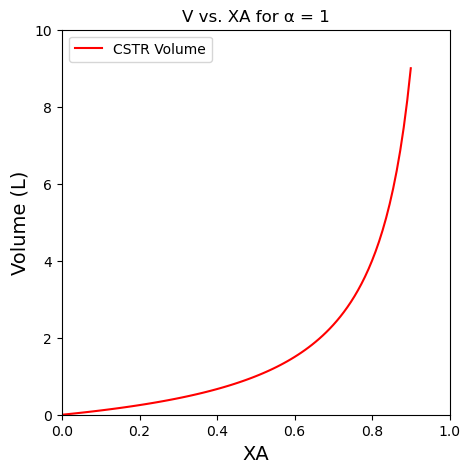

In [ ]:
###################################################################################
# Re-defining some globals; α = 1 and XA is an array                              #
###################################################################################

α  = 1
XA = np.linspace(0.0, 0.9, 100) 

###################################################################################
# Broadcast volume calculations to set of conversions for a first order reaction  #
###################################################################################

V = VCSTR(XA, α)

###################################################################################
# Graph V vs XA                                                                   #
###################################################################################

plt.figure(figsize = (5,5))
plt.title('V vs. XA for α = 1')
plt.plot(XA, V, color = 'red', label = 'CSTR Volume')
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### Looping to calculate reactor volume for multiple conversions and multiple reaction orders 

The script below accomplishes the same as we did above, it just uses the function to broadcast the volume calculation (for a specific reaction order α) to a large set of fractional conversions. It also iterates over the reaction orders directly (`for alpha in avals`) rather than creating an index, and it does not store the entire Volume array -- it only graphs the result. The advantage is this produces a pretty clean and efficient bit of code, with the disadvantage that we did not store all of the results in a globally accessible variable, which prevents us from accessing this information outside of the for loop.

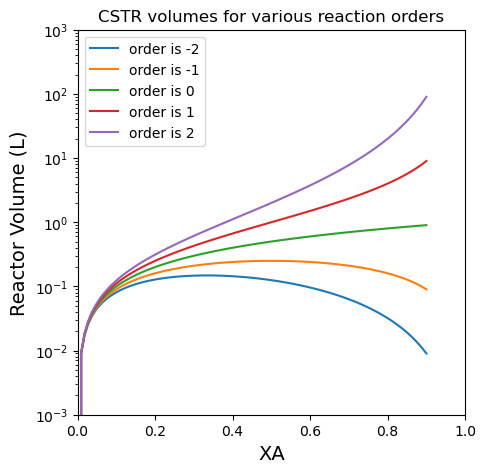

In [ ]:
XA = np.linspace(0, 0.9, 100)
α  = np.array([-2, -1, 0, 1, 2])

plt.figure(figsize = (5, 5))
for a in α:
    V   = VCSTR(XA, a)
    plt.semilogy(XA, V, label = f'order is {a}')
plt.xlim(0,1)
plt.ylim(1e-3, 1e3)
plt.title('CSTR volumes for various reaction orders')
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Reactor Volume (L)', fontsize = 14)
plt.legend()
plt.show()

## Solving for PFR Volumes

Solving for large sets of PFR volumes (as functions of conversion and reaction order) is actually a bit trickier. Recall from [Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html) that the solution for the PFR volume in this particular system is:

$$V_\textrm{PFR} = \int_0^{X_A}\frac{F_{A,f} \, dX_A}{r \, (X_A)}$$

This means that finding the PFR volume requires us to solve the definite integral by integrating the right hand side from the lower limit of zero conversion to the upper limit of conversion we are trying to achieve in this reactor. If we know the rate law exactly, we can solve this analytically. In this case, we don't know the rate law per se. This is because we will be changing reaction orders, and the analytical solution changes as we change reaction orders. We'd like to make a general solution for any rate law. One general and relatively easy way to do this is to substitute our generic rate law into the above definite integral:

$$V_\textrm{PFR} = \int_0^{X_A}\frac{F_{A,f} \, dX_A}{kC_{A,f}^\alpha \, (1 - X_A)^\alpha}$$

Once we do this, we can solve the definite integral using Gaussian Quadrature

### Solving the PFR problem for a single conversion and single reaction order

Below, we'll solve this for a single exit conversion. We should notice that we still have to solve the integral from the lower limit (0) to the exit conversion. We will solve for the PFR volume required to achieve 50% conversion since we know the answer should be 0.69L based on the examples in [Notebook 25][Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html). This is again a benchmarking exercise to make sure the functions are defined correctly here before we move to more complex analyses.

In [ ]:
α        = 1
XA       = 0.5
CA       = lambda X: CAf*(1 - X)
r        = lambda X: k*CA(X)**α
intfun   = lambda X: FAf/r(X)
vol, err = quad(intfun, 0, XA)
print(f'To achieve a conversion of {XA:0.2}, the PFR Volume must be {vol:3.3}L')

To achieve a conversion of 0.5, the PFR Volume must be 0.693L


### Embedding the solution of the definite integral inside of a function...

Let's make this general purpose and reusable. We can do so by translating the concept above into a function that can be to calculate PFR volume for *any* conversion and *any* reaction order. Notice that this function has a call to `quad()` embedded inside of its scope. We'll test it for 50% conversion and first order kinetics as usual to see if we get 0.69L.

In [ ]:
def VPFR(XA, α):
    CA     = lambda X: CAf*(1 - X)
    r      = lambda X: k*CA(X)**α
    intfun = lambda X: FAf/r(X)
    vol, err = quad(intfun, 0, XA)
    return vol

XA = 0.5
α  = 1
print(f'To achieve a conversion of {XA:0.2}, the PFR Volume must be {VPFR(XA, α):3.3f}L')

To achieve a conversion of 0.5, the PFR Volume must be 0.693L


### We run into problems with broadcasting this function to many fractional conversions

In this case, we can't broadcast because we're using `quad()`, which takes a single floating point decimal or integer for the lower and upper limits of integration (see error below).  So, if we want to calculate the PFR volume for multiple conversions using quadrature, we have to use a loop.

In [ ]:
α  = 1
XA = np.linspace(0.0, 0.9, 100)
VPFR(XA, α)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Running a for loop over an iterator created using the range function

Here's one way that we could write that loop -- we iterate over an index or "counter" and we use it to specify which element in the arrays we are working with. This is similar to the way you'd probably write a loop in Matlab.  In the cell below, I do this with the range function, which is probably similar to how we all learned to first write a for loop.

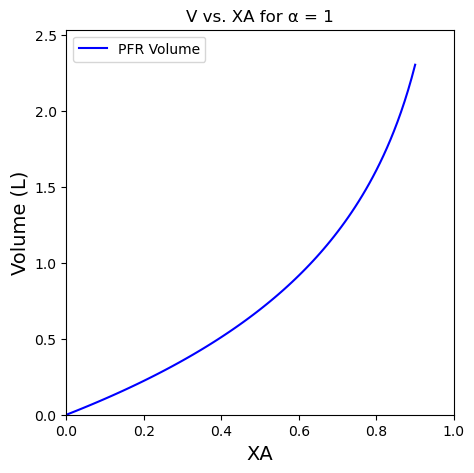

In [ ]:
XA = np.linspace(0, 0.9, 100)
V  = np.zeros(len(XA))

for i in range(0, len(XA), 1):
    V[i]      = VPFR(XA[i], α) #equivalent to V[i], err = quadrature(intfun, 0, XA[i])
      
plt.figure(figsize = (5,5))
plt.title('V vs. XA for α = 1')
plt.plot(XA, V, color = 'blue', label = 'PFR Volume')
plt.xlim(0, 1)
plt.ylim(0, max(V)*1.1)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### Running a for loop using the enumerate() function to create the iterator

Here's a slightly different way to approach the problem -- it makes use of the `enumerate()` function, which returns both the value and the index of an element in an array. Consider the code below and see if you can spot how it is different from the loop above that uses the range function.

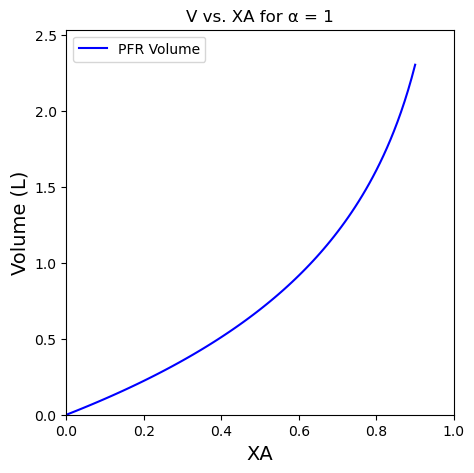

In [ ]:
XA = np.linspace(0, 0.9, 100)
V  = np.zeros(len(XA))

for i, X in enumerate(XA):
    V[i]      = VPFR(X, α)

plt.figure(1, figsize = (5,5))
plt.title('V vs. XA for α = 1')
plt.plot(XA, V, color = 'blue', label = 'PFR Volume')
plt.xlim(0, 1)
plt.ylim(0, max(V)*1.1)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### List comprehensions -- common in Python and Julia

If you review [Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html), you'll see that it makes use of list comprehensions. The syntax of a list comprehension may be unfamiliar to you, especially if you are coming from a Matlab background and have not had prior courses in Python. List comprehensions are basically shorthand for loops. They make it very fast and easy to write simple loops and store the result of those loops in a ***list*** (not a numpy array).  To understand a list comprehension, you have to know a little about how we would use a for loop with lists to do the above operation (solve for the volume of a PFR for many different conversions using quadrature). 

If you reference [Notebook 02](https://jqbond.github.io/CEN587/Notebooks/587-N02.html), you will recall that in base python, the `list` is the default type of collection. At first glance, they do not appear to be much different from a numpy array (vector, column, row, matrix, etc.), but their shapes and indexing conventions are distict, and you can't really do math directly on lists. So let's say we wanted to calculate the square of all of the integers between 1 and 10 in base Python without using numpy arrays. Our instinct at this point might be to try to broadcase the square operator `**2` to all of the values in our list...but we'll run into an error there.

In [ ]:
x = list(range(1,11))
print(x)
x**2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In base Python (that is, without working in numpy arrays), it would be mandatory to write a loop to do this.  A for loop is a natural choice for this specific example.  Working with lists:

In [ ]:
x = list(range(1,11))

squares = []

for value in x:
    squares.append(value**2) #this appends the current value of x^2 to the list "squares"

print(squares)
type(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


list

This type of scenario (needing to perform operations on each element of a list) is so common in base Python that there is a shorthand syntax that is equivalent to the above.  This is a list comprehension.  Basically, it performs an operation on each element of a list and stores the output of that operation in a new list.  It is the equivalent of the above for loop.

In [ ]:
x = list(range(1,11))
squares = [value**2 for value in x] 
print(squares)
type(squares)  #Notice: a comprehension will always return a list.

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


list

#### Using a list comprehension to "broadcast" the VPFR function

In the solutions for [Notebook 25](https://jqbond.github.io/CEN587/Notebooks/587-N25.html), we used a comprehension to pass many conversions to the VPFR function. This is roughly equivalent to the for loops written above using `range()` and `enumerate()`.

```{warning}
The list comprehension will generate a list...if you want it to behave like a numpy array, you'll have to pass that result to the array constructor!
```

<class 'list'>
<class 'numpy.ndarray'>


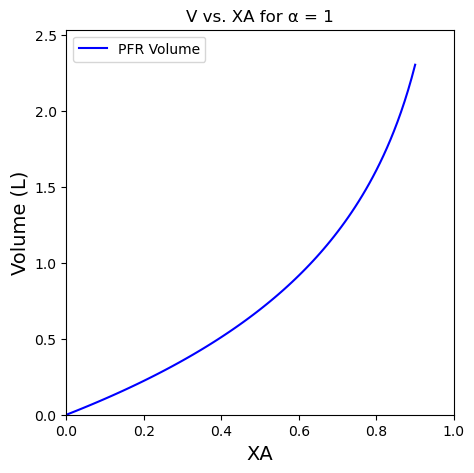

In [ ]:
α  = 1
XA = np.linspace(0, 0.9, 100)

############################################################################################
# Solve for the PFR volume required to achieve every XA in XA above for α = 1              #
############################################################################################

V = [VPFR(X, α) for X in XA]
print(type(V))

############################################################################################
# A comprehension will always return a list; convert to a numpy array if desired           #
############################################################################################  

V = np.array(V)
print(type(V))

plt.figure(1, figsize = (5,5))
plt.title('V vs. XA for α = 1')
plt.plot(XA, V, color = 'blue', label = 'PFR Volume')
plt.xlim(0, 1)
plt.ylim(0, max(V)*1.1)
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### Evaluating the PFR Volume for many fractional conversions and many reaction orders

If you wanted to calculate the PFR volume for many reaction orders, you'd need to nest loops somehow. Broadcasting is not really an option due to the need for `quad()` to have scalar arguments. You can write two nested for loops, you can nest a comprehension in a for loop...you can probably even do a 2D comprehension, though I find comprehensions are best for *simple* for loops and it gets hard to keep dimensionality straight in one-liners. Here's an example of one way to get the PFR volume for many conversions and several reaction orders. 

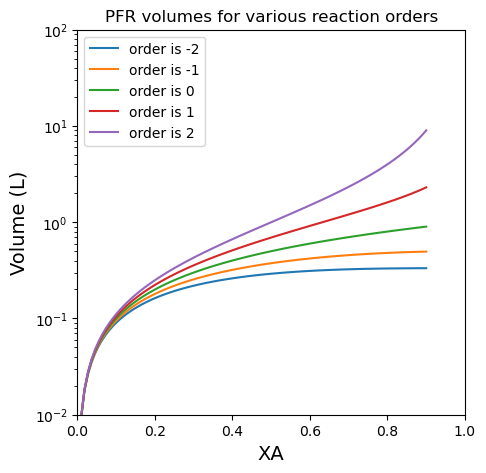

In [ ]:
α  = [-2, -1, 0, 1, 2]
XA = np.linspace(0, 0.9, 100)

plt.figure(1, figsize = (5,5))
for a in α:
    temp   = [VPFR(X, a) for X in XA]
    V      = np.array(temp)
    plt.semilogy(XA, V, label = f'order is {a}')

plt.xlim(0,1)
plt.ylim(1e-2, 1e2)
plt.title('PFR volumes for various reaction orders')
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### Overlaying CSTR and PFR volumes in a single plot

At the risk of putting too much information into a single graph, it is worth considering how to control formatting for figures that are illustrating more complex data sets. For example, below, we introduce list of strings that represent colors, and we use this to ensure that the CSTR and PFR volumes for a given reaction order are plotted in the same color. If you study the code a bit, you'll see that it makes use of lists, numpy arrays, strings, floating point decimals, `enumerate()`, and list comprehensions.

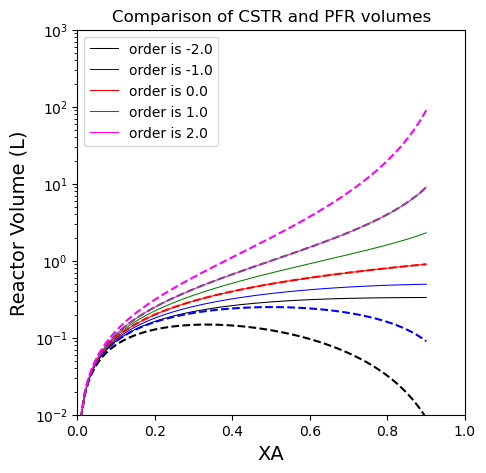

In [ ]:
XA   = np.linspace(0, 0.9, 100)
α    = np.array([-2., -1., 0., 1., 2.])
cset = ['black', 'blue', 'red', 'green', 'magenta']

plt.figure(1, figsize = (5, 5))
for i, a in enumerate(α):
    VC = VCSTR(XA, a)
    VP = np.array([VPFR(X, a) for X in XA])
    plt.semilogy(XA, VC, linestyle = 'dashed', color = cset[i])
    plt.semilogy(XA, VP, linestyle = 'solid', linewidth = 0.75, label = f'order is {a}', color = cset[i])

plt.xlim(0,1)
plt.ylim(1e-2, 1e3)
plt.title('Comparison of CSTR and PFR volumes')
plt.xlabel('XA', fontsize = 14)
plt.ylabel('Reactor Volume (L)', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()